In [1]:
import pandas as pd

df = pd.read_csv('/content/data_int.csv')
print(df.head())
print(df.describe(include='all'))

   Unnamed: 0  patient_id_deident  race_BLACK  race_UNKNOWN  race_OTHER  \
0           0                   3           0             0           0   
1           1                  10           0             0           1   
2           2                  21           0             0           0   
3           3                  31           0             0           0   
4           4                  34           0             0           0   

   race_WHITE  ethnicity_HISPANIC OR LATINO  ethnicity_NOT HISPANIC OR LATINO  \
0           1                             0                                 1   
1           0                             1                                 0   
2           1                             0                                 1   
3           1                             0                                 0   
4           1                             1                                 0   

   ethnicity_UNKNOWN  gender_F  ...  \
0                  0   

<ipython-input-2-4f8dad009cbf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_race.index, y=df_race.values, palette='viridis')


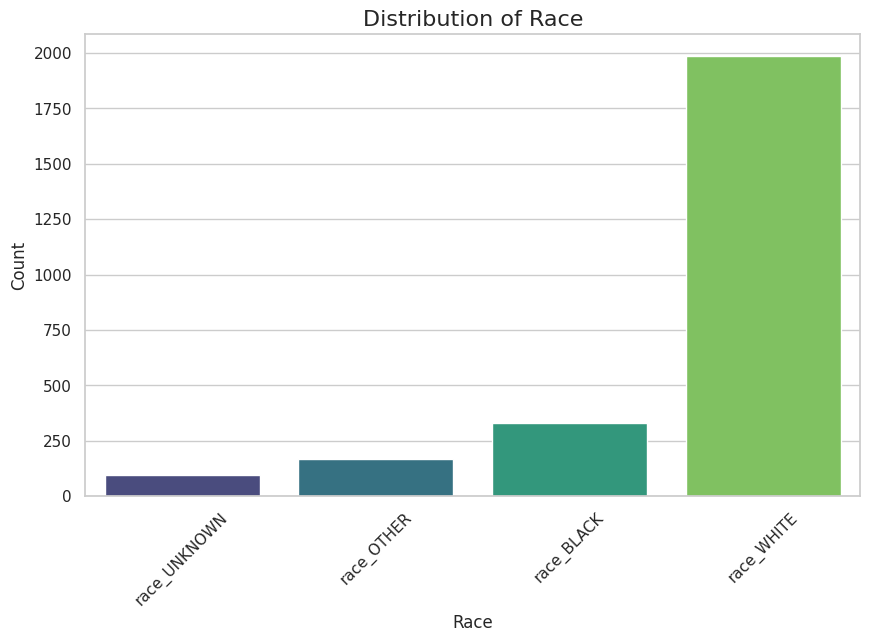

<ipython-input-2-4f8dad009cbf>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ethnicity.index, y=df_ethnicity.values, palette='viridis')


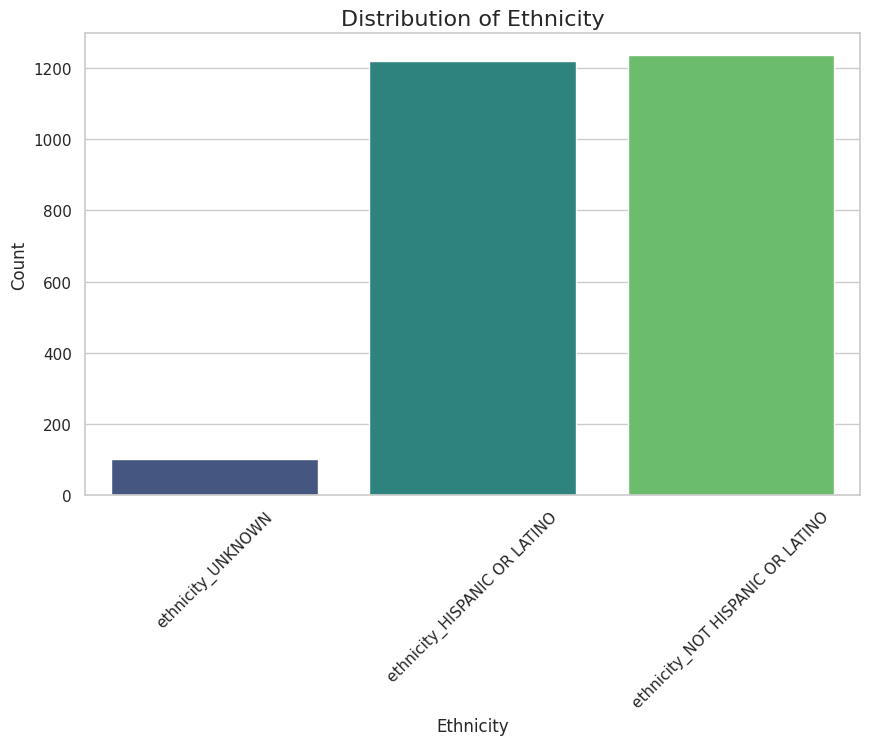

<ipython-input-2-4f8dad009cbf>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_gender.index, y=df_gender.values, palette='viridis')


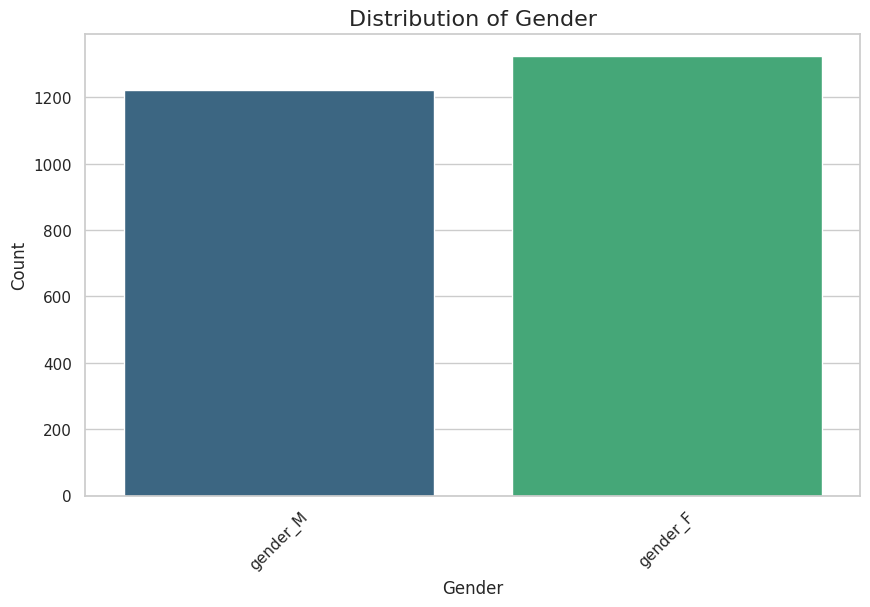

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plotting the distribution of races
plt.figure(figsize=(10, 6), facecolor='white')
race_columns = ['race_BLACK', 'race_UNKNOWN', 'race_OTHER', 'race_WHITE']
df_race = df[race_columns].sum().sort_values()
ax = sns.barplot(x=df_race.index, y=df_race.values, palette='viridis')
ax.set_title('Distribution of Race', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Race', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of ethnicity
plt.figure(figsize=(10, 6), facecolor='white')
ethnicity_columns = ['ethnicity_HISPANIC OR LATINO', 'ethnicity_NOT HISPANIC OR LATINO', 'ethnicity_UNKNOWN']
df_ethnicity = df[ethnicity_columns].sum().sort_values()
ax = sns.barplot(x=df_ethnicity.index, y=df_ethnicity.values, palette='viridis')
ax.set_title('Distribution of Ethnicity', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Ethnicity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of gender
plt.figure(figsize=(10, 6), facecolor='white')
gender_columns = ['gender_F', 'gender_M']
df_gender = df[gender_columns].sum().sort_values()
ax = sns.barplot(x=df_gender.index, y=df_gender.values, palette='viridis')
ax.set_title('Distribution of Gender', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)
plt.xticks(rotation=45)
plt.show()

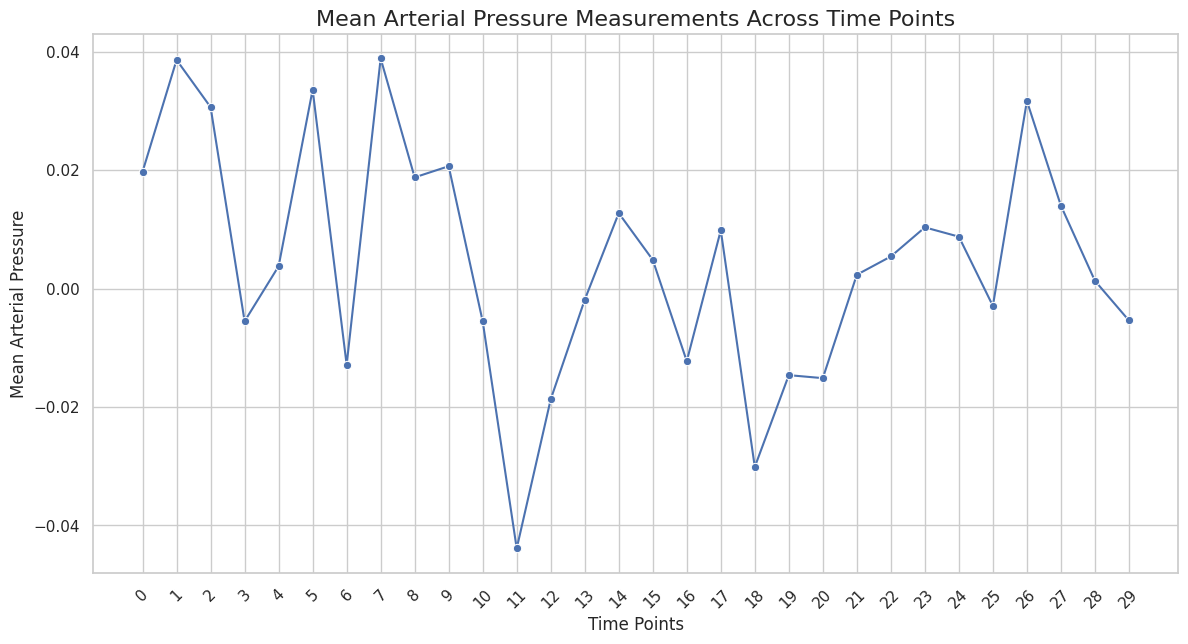

In [3]:
# Plotting the distribution of mean arterial pressure measurements across different time points
plt.figure(figsize=(14, 7), facecolor='white')
map_columns = [col for col in df.columns if 'VITALS_Mean Arterial Pressure' in col]
df_map = df[map_columns].mean()
ax = sns.lineplot(x=range(len(map_columns)), y=df_map.values, marker='o', linestyle='-', color='b')
ax.set_title('Mean Arterial Pressure Measurements Across Time Points', fontsize=16)
ax.set_ylabel('Mean Arterial Pressure', fontsize=12)
ax.set_xlabel('Time Points', fontsize=12)
plt.xticks(ticks=range(len(map_columns)), labels=[str(i) for i in range(len(map_columns))], rotation=45)
plt.show()

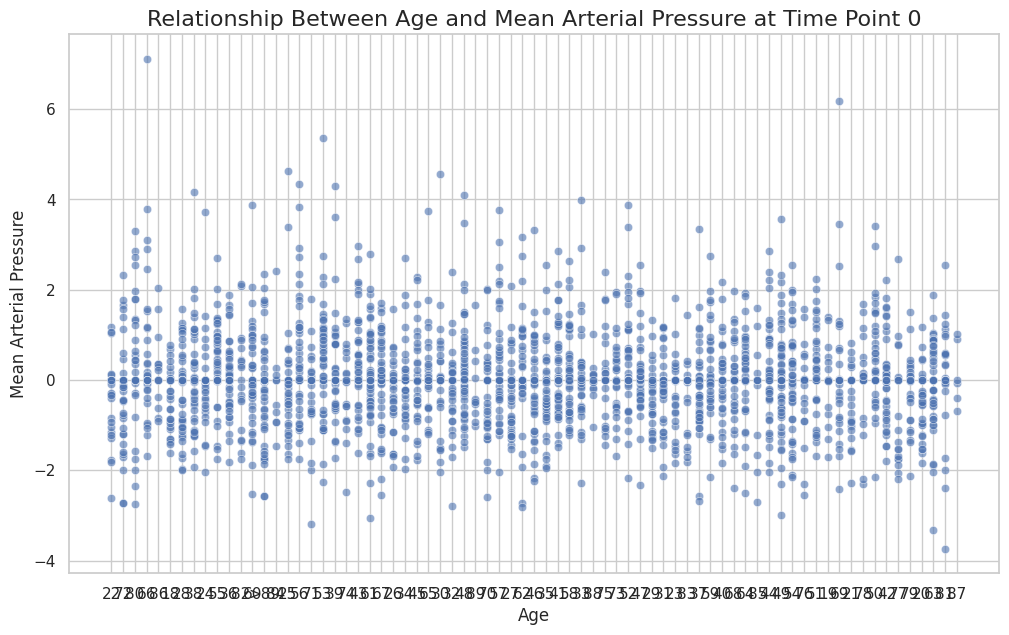

In [4]:
# Analyzing the relationship between age and mean arterial pressure
plt.figure(figsize=(12, 7), facecolor='white')
# Using the first mean arterial pressure measurement as a representative
sns.scatterplot(x='age', y='VITALS_Mean Arterial Pressure_703306_0', data=df, color='b', alpha=0.6)
plt.title('Relationship Between Age and Mean Arterial Pressure at Time Point 0', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Arterial Pressure', fontsize=12)
plt.grid(True)
plt.show()

In [6]:
##Calculating the correlation between age and mean arterial pressure
# Using the first mean arterial pressure measurement as a representative
correlation = df['age'].corr(df['VITALS_Mean Arterial Pressure_703306_0'])
print(f'The correlation coefficient between age and mean arterial pressure at Time Point 0 is {correlation:.2f}.')

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [7]:
# Checking the data types of the 'age' and 'VITALS_Mean Arterial Pressure_703306_0' columns to identify the issue.
print('Data type for age:', df['age'].dtype)
print('Data type for mean arterial pressure:', df['VITALS_Mean Arterial Pressure_703306_0'].dtype)
# Displaying some values from these columns to see if there are any non-numeric entries.
print('Sample data for age:', df['age'].head())
print('Sample data for mean arterial pressure:', df['VITALS_Mean Arterial Pressure_703306_0'].head())

Data type for age: object
Data type for mean arterial pressure: float64
Sample data for age: 0    22
1    72
2    80
3    66
4    86
Name: age, dtype: object
Sample data for mean arterial pressure: 0    1.040006
1    0.000000
2    1.792296
3    2.893105
4    0.000000
Name: VITALS_Mean Arterial Pressure_703306_0, dtype: float64


In [8]:
# Converting 'age' column to numeric, coercing errors to NaN
import numpy as np
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Dropping any rows where 'age' is NaN after conversion (if any)
df = df.dropna(subset=['age'])
# Recalculating the correlation between age and mean arterial pressure
correlation = df['age'].corr(df['VITALS_Mean Arterial Pressure_703306_0'])
print(f'The correlation coefficient between age and mean arterial pressure at Time Point 0 is {correlation:.2f}.')

The correlation coefficient between age and mean arterial pressure at Time Point 0 is 0.06.


This indicates a very weak positive correlation between age and mean arterial pressure, suggesting that as age increases, there is a slight tendency for mean arterial pressure to increase, but the relationship is not strong.

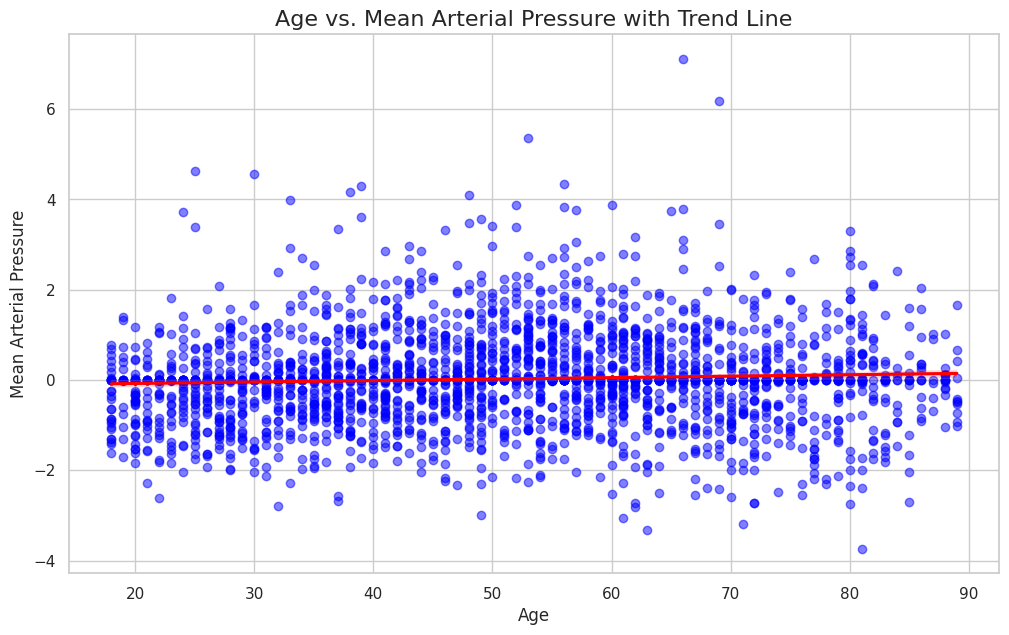

In [9]:
# Creating a scatter plot with a trend line to visualize the relationship between age and mean arterial pressure
plt.figure(figsize=(12, 7), facecolor='white')
sns.regplot(x='age', y='VITALS_Mean Arterial Pressure_703306_0', data=df, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Age vs. Mean Arterial Pressure with Trend Line', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Arterial Pressure', fontsize=12)
plt.grid(True)
plt.show()

The trend line is relatively flat, which visually confirms the weak correlation coefficient of 0.06, indicating a very slight increase in mean arterial pressure with age.

In [10]:
# Creating age groups and calculating the mean arterial pressure for each group
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
mean_arterial_pressure_by_age_group = df.groupby('age_group')['VITALS_Mean Arterial Pressure_703306_0'].mean()
print(mean_arterial_pressure_by_age_group)

age_group
0-30     -0.240865
31-40    -0.037199
41-50     0.147253
51-60     0.269104
61-70     0.078708
71-80    -0.099394
81-90    -0.084922
91-100         NaN
Name: VITALS_Mean Arterial Pressure_703306_0, dtype: float64


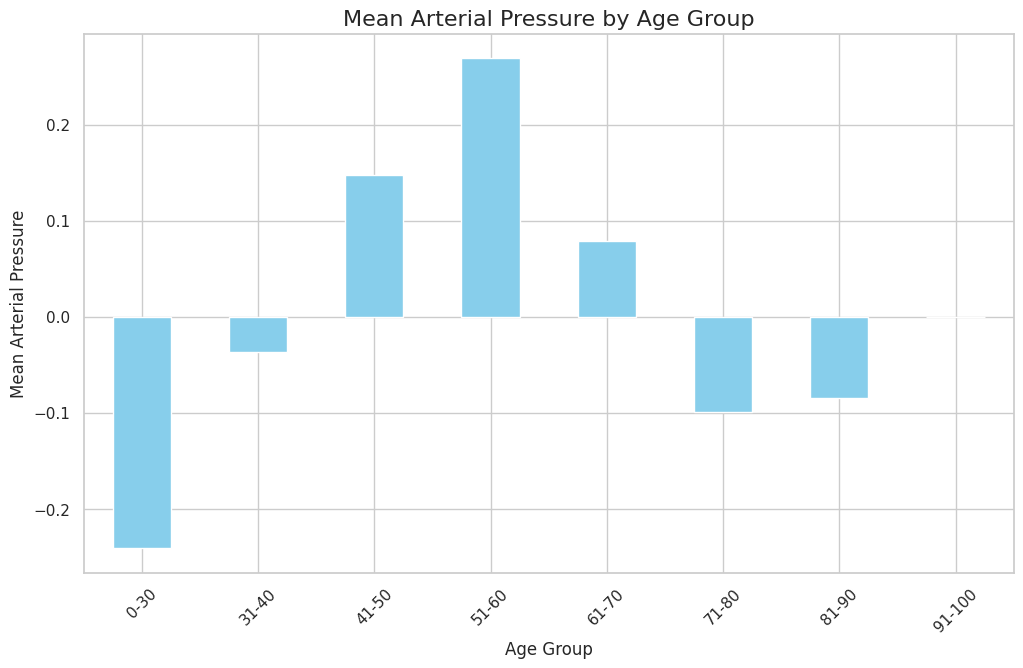

In [11]:
## Variation of arterial pressure across different age groups
# Creating a bar plot to visualize the mean arterial pressure distribution across different age groups
plt.figure(figsize=(12, 7), facecolor='white')
mean_arterial_pressure_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Mean Arterial Pressure by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Arterial Pressure', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()